In [1]:
import sys
sys.path.append('..')
import os, pickle, torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from src.feature import precursor_count

root_f = '/home/jhyang/WORKSPACES/MODELS/isyn/VAE_FCNN'
root_g = '/home/jhyang/WORKSPACES/MODELS/isyn/VAE_graph'
root_t = '/home/jhyang/WORKSPACES/MODELS/isyn/VAE_test'

In [2]:
output = {}
for dir in os.listdir(root_t):
    if not os.path.isfile(os.path.join(root_t, dir, 'output.valid.pkl')): continue
    output[dir] = {
        'test' :pickle.load(open(os.path.join(root_t, dir, 'output.test.pkl'), 'rb')),
        'valid':pickle.load(open(os.path.join(root_t, dir, 'output.valid.pkl'), 'rb')),
    }

In [7]:
out = 

In [49]:
#np.unique(output['convolution_active_composit_batch_0128_mdim_32_128_4_cls_case_09']['test']['label'], return_counts=True)
valid = output['convolution_active_composit_batch_0128_mdim_32_128_4_cls_case_09']['valid']
test  = output['convolution_active_composit_batch_0128_mdim_32_128_4_cls_case_09']['test']
for i, (comp, cnt) in enumerate(precursor_count.items()):
    s = '{:10s} {:5d} | '.format('-'.join(comp), cnt)
    f1s = []
    for d in [valid,test]:
        m1 = d['label'] == i
        m2 = d['pred'].argmax(1) == i
        tp = (m1 & m2).sum()
        tn = (~m1 & ~m2).sum()
        fp = (~m1 & m2).sum()
        fn = (m1 & ~m2).sum()
        if tp.sum() != 0:
            precision = tp / (tp + fp)*100
            recall = tp / (tp + fn)*100
            f1_score = 2 * tp / (2 * tp + fp + fn) * 100
            f1s.append(f1_score)
            s += ' {:5d} {:5d} {:8.3f} {:8.3f} {:8.3f} |'.format(m1.sum(), m2.sum(), precision, recall, f1_score)
        else:
            s += ' '*40 + '|'
    if len(s.replace('|','').strip()) < 20:
        continue
#    if np.min(f1s) < 80: print(s)
    if '' in s: print(s)

Pt            90 |     12    11  100.000   91.667   95.652 |     6     6  100.000  100.000  100.000 |


In [26]:
from src.feature import feature_to_composit, feature_to_ligand_index, ligand_composit_feature, ligand_label, ligand_index, ligand_vector
from src.utils import find_nearest, squared_error, cosin_similarity
from sklearn.metrics import confusion_matrix

prd = output['conv_active_composit_batch_0256_mdim_16_032_2_case_09']['valid']['pred']
inp = output['conv_active_composit_batch_0256_mdim_16_032_2_case_09']['valid']['input']

inp_lbls = []
prd_lbls = []
for i, p in zip(inp, prd):
    i_i, sser, csim = find_nearest(i.reshape(1,-11), ligand_vector)
    i_p, sser, csim = find_nearest(p.reshape(1,-11), ligand_vector)
    inp_lbls.append(i_i[0])
    prd_lbls.append(i_p[0])
cm = confusion_matrix(inp_lbls, prd_lbls)

In [43]:
for i, (idx, cnt) in enumerate(zip(*np.unique(inp_lbls+prd_lbls, return_counts=True))):
#    print(ligand_index[idx], cnt, cm[i,i] / cm[i].sum(), cm[i,i] / cm[:,i].sum())
    print('{:15s} {:10d} ({:.5f}) {:10d} ({:.5f})'.format(ligand_index[i], cm[i].sum(), cm[i].sum()/len(inp_lbls), cm[:, i].sum(), cm[:, i].sum()/len(inp_lbls)))
#for i in range(79):
#    print('{:15s} {:10.0f} {:8.4f} {:8.4f}'.format(ligand_index[i], cm[i, i], cm[i, i] / cm[i].sum(), cm[i, i] / cm[:, i].sum()))

Metal-O               8486 (0.42915)       9203 (0.46541)
Metal-C-O             2493 (0.12607)       2393 (0.12102)
Metal                 7103 (0.35921)       7803 (0.39461)
Metal-H-O              144 (0.00728)          0 (0.00000)
Metal-N-O               95 (0.00480)          0 (0.00000)
Se                     294 (0.01487)          0 (0.00000)
H-N-O-P                189 (0.00956)        126 (0.00637)
S                      203 (0.01027)          0 (0.00000)
Metal-H-C-O             81 (0.00410)          0 (0.00000)
Metal-F                147 (0.00743)          0 (0.00000)
Metal-S                140 (0.00708)         28 (0.00142)
Metal-N                 36 (0.00182)          0 (0.00000)
Metal-Cl                37 (0.00187)          0 (0.00000)
Metal-H-N-O             53 (0.00268)          0 (0.00000)
Metal-O-P               39 (0.00197)          0 (0.00000)
Metal-H-O-P             32 (0.00162)          0 (0.00000)
P                       33 (0.00167)        110 (0.00556)
Metal-Se      

In [236]:
tol = 0.5
input_index = np.array(feature_to_ligand_index(o['input']))
pred_index = np.array(feature_to_ligand_index(o['pred'], tol=0.5))
input_label = np.array([ligand_index[i] for i in input_index])
pred_label = np.array([ligand_index[i] if i != -1 else 'Fail' for i in pred_index])

In [44]:
import gzip, pickle
with gzip.open('../data/unique_ligand.pkl.gz','rb') as f:
    unique_ligand = pickle.load(f)
unique_ligand

{('O',): {'count': 86539,
  'metals': {('Y',): {'count': 3101,
    'case': [{'composition': {'Y': 0.4, 'O': 0.6},
      'years': [1979,
       1979,
       1986,
       1995,
       1995,
       1996,
       1996,
       1996,
       1996,
       1997,
       1997,
       1997,
       1997,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1998,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       1999,
       2000,
       2000,
       2000,
       2000,
       2000,
       2000,
       2000,
      

In [102]:
ligands = {}
precursors = {}
for ligand, _ligand_data in unique_ligand.items():
    for metal, _metal_data in _ligand_data['metals'].items():
        precursor = metal, ligand
        c = _metal_data['count']
        if len(metal) == 0:
            if precursor not in ligands.keys():
                ligands[precursor] = 0
                precursors[precursor] = 0
            ligands[precursor] += c
            precursors[precursor] += c
        else:
            if precursor not in precursors.keys():
                precursors[precursor] = 0
            if (('Metal',), ligand) not in ligands.keys():
                ligands[(('Metal',), ligand)] = 0
            ligands[(('Metal',), ligand)] += c
            precursors[precursor] += c
ligands = {k:v for k,v in sorted(ligands.items(), key=lambda x: x[1], reverse=True)}
precursors = {k:v for k,v in sorted(precursors.items(), key=lambda x: x[1], reverse=True)}
ligands.update({((),()):0})

precursors.update({((),()):0})


In [107]:
from src.feature import active_composit_feature, ligand_composit_feature

ligand_vector = np.vstack([ligand_composit_feature({e if e != 'Metal' else 'Li':1 for e in k[0] + k[1]}, dtype=float) for k in ligands.keys()])
precursor_vector = np.vstack([active_composit_feature({e:1 for e in k[0] + k[1]}, dtype=float) for k in precursors.keys()])

def parse_feature(feat_vec, csim_cut = 0.5, sser_cut = 1.0, to_string=False):
    out = []
    if feat_vec.shape[-1] == 12:
        ref = ligand_vector
        chrs = np.array(['-'.join(k[0] + k[1]) for k in ligands.keys()] + ['Unknown'])
    elif feat_vec.shape[-1] == 97:
        ref = precursor_vector
        chrs = np.array(['-'.join(k[0] + k[1]) for k in precursors.keys()] + ['Unknown'])
    else:
        raise ValueError('Not supported feature type')

    for idx, sser, csim in zip(*find_nearest(feat_vec, ref)):
        if (sser > sser_cut) or (csim < csim_cut):
            out.append(-1)
        else:
            out.append(int(idx))
    if to_string:
        return chrs[out]
    else:
        return out
    

_inp_lbls = parse_feature(inp)
_prd_lbls = parse_feature(prd)

In [108]:
for i, j in zip(np.array(_inp_lbls).astype(int), np.array(_prd_lbls)):
    print(i,j)

4 0
4 0
79 79
0 0
0 0
0 0
79 79
0 0
0 0
0 0
79 79
1 0
1 1
0 0
79 79
0 0
3 1
79 79
0 0
0 0
79 79
0 0
0 0
79 79
4 0
4 0
79 79
4 0
0 0
79 79
1 0
0 0
79 79
8 0
0 0
79 79
4 0
4 0
79 79
0 0
0 0
1 1
79 79
26 79
1 1
1 0
0 0
3 1
79 79
0 0
0 0
0 1
79 79
0 0
0 0
79 79
0 0
1 1
3 0
79 79
3 0
1 1
0 0
79 79
8 0
1 1
79 79
1 0
8 0
79 79
0 0
10 0
1 1
13 0
79 79
1 1
0 0
79 79
0 0
0 0
79 79
0 0
3 0
79 79
4 0
4 0
79 79
0 0
8 0
79 79
0 0
0 0
79 79
1 1
13 0
79 79
1 0
4 0
79 79
7 79
10 2
2 2
0 0
0 0
79 79
0 0
4 0
79 79
2 2
7 79
2 2
0 0
4 0
79 79
14 1
14 0
79 22
6 22
8 1
13 0
6 19
3 1
0 0
1 1
0 0
79 79
0 0
0 0
0 0
79 79
0 0
15 1
79 19
1 0
0 0
79 79
1 1
1 1
0 0
79 79
1 1
0 0
0 0
79 79
0 0
1 1
0 0
79 79
1 0
0 0
0 0
79 79
0 0
8 0
79 79
0 0
1 1
0 0
79 79
0 0
1 1
0 0
79 79
0 0
6 19
0 0
19 19
4 0
0 0
79 79
0 0
0 0
4 0
79 79
4 0
0 0
79 79
8 1
8 0
79 79
0 0
0 1
0 0
79 79
9 1
0 0
0 0
1 1
79 79
0 0
0 0
0 0
79 79
4 0
4 0
79 79
0 0
4 0
79 79
4 0
0 0
1 1
22 22
0 0
1 1
0 0
6 22
4 1
3 0
0 0
79 79
0 0
3 1
79 79
3 0
0 0
79 79


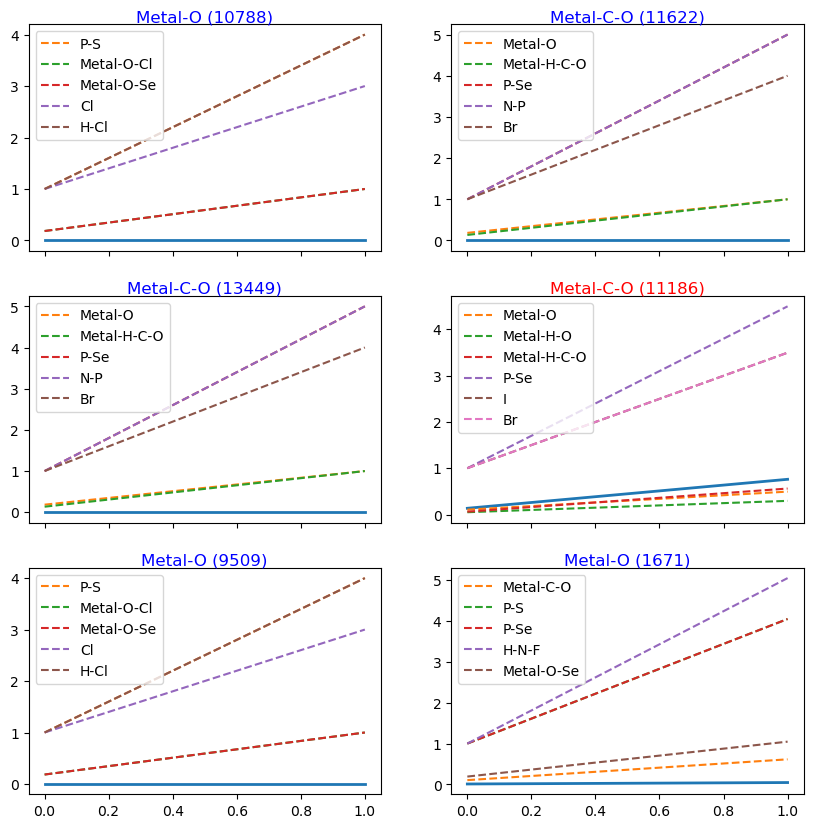

In [243]:
f, axs = plt.subplots(3,2,figsize=(10,10), sharex=True)
for i, ax in zip(np.random.randint(0, len(input_index), 6), axs.reshape(-1)):
    i_prd = pred_index[i]
    i_inp = input_index[i]
    ax.set_title(ligand_index[i_inp] + f' ({i})', color='red' if i_prd != i_inp else 'blue', pad=-1)
    sser = squared_error(o['pred'][i].reshape(1,-1), ligand_vector, average=False)
    csim = cosin_similarity(o['pred'][i].reshape(1,-1), ligand_vector, average=False)
    ys = np.array([k * sser + (5 - k) * (1 - csim) for k in range(6)]).T * 0.2
    x = np.linspace(0,1,6)
    ax.plot(x, ys[i_inp], lw=2)
    for j in sorted(np.unique(np.hstack([np.argsort(sser)[:3], np.argsort(csim)[:3]]))):
        if j == i_inp: continue
        ax.plot(x, ys[j], ls='--', label=ligand_index[j])
    ax.legend(loc='upper left')


In [36]:
pred_index[4554], input_index[4554]

(0, 0)

In [49]:
for i_inp in sorted(np.unique(input_index), key=lambda x: ligand_index[x]):
    m = input_index == i_inp
    a = np.sum(pred_index[m] == i_inp)
    t = np.sum(m)
    print('{:15s} {:5d} {:5d} {:8.3f}'.format(ligand_index[i_inp], t, a, 100*a/t))
    
#    print(sorted(zip(*np.unique(np.array(pred_label)[m], return_counts=True)), key=lambda x: x[1], reverse=True))

C                   7     7  100.000
H-C-N-O             2     0    0.000
H-C-O               6     0    0.000
H-C-S-Br            3     0    0.000
H-C-S-Cl            3     0    0.000
H-C-S-I             4     0    0.000
H-N-Cl             19    12   63.158
H-N-F               2     0    0.000
H-N-O-P            18    18  100.000
H-N-O-S             5     0    0.000
H-O-P               8     0    0.000
Metal            1518  1466   96.574
Metal-Br           10     2   20.000
Metal-C             4     0    0.000
Metal-C-O        1572  1448   92.112
Metal-C-S           1     0    0.000
Metal-Cl           23     5   21.739
Metal-F            36    14   38.889
Metal-H-C-N-Br      1     0    0.000
Metal-H-C-N-Cl      1     0    0.000
Metal-H-C-N-I       1     0    0.000
Metal-H-C-O        90     0    0.000
Metal-H-F           1     0    0.000
Metal-H-N-O        28     3   10.714
Metal-H-O          97    15   15.464
Metal-H-O-P        10     0    0.000
Metal-H-O-S         2     0    0.000
M